Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `SECTION` below:

In [64]:
NAME = "Sadman Sharif"
ID = "20101107"
SECTION = "7"

---

Polynomial Root Finding Using Bisection Method
---

### `pandas` Dataframe:
Before we start we will know a little about `pandas` dataframe. `pandas` is a python library. Dataframes are classes that are used to store complex data. You can initialize one as a python dictionary. Let's take a look. 

In [65]:
import pandas as pd

x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [1.0, 5.2, 3.9, 8.4, 14.6, 12.3, 8.9, 10.2]

dictionary = {
    "x": x,
    "y": y,
}
df = pd.DataFrame(dictionary)
df.head(8)

,x,y
0,0,1.0
1,1,5.2
2,2,3.9
3,3,8.4
4,4,14.6
5,5,12.3
6,6,8.9
7,7,10.2


We can use it to print data in a tabular format. We can even use more numpy arrays with it.

In [66]:
import numpy as np

x = np.linspace(0, np.pi/2, 15)
y = np.sin(x)

dictionary = {
    "x": x,
    "sin(x)": y,
}
df = pd.DataFrame(dictionary)
df.head(15)

,x,sin(x)
0,0.000000,0.000000
1,0.112200,0.111964
2,0.224399,0.222521
3,0.336599,0.330279
4,0.448799,0.433884
5,0.560999,0.532032
6,0.673198,0.623490
7,0.785398,0.707107
8,0.897598,0.781831
9,1.009798,0.846724


### Root Finding:
Let $f(x)$ be a function of $x$. if for some $x=\alpha, f(x) = f(\alpha) = 0$, we say $\alpha$ is a root of function $x$.

Let, 
$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{6.1}$$

The graph of $f(x)$ looks like this.

[-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


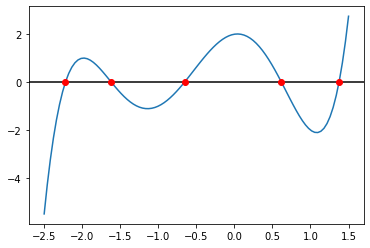

In [67]:
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
x = np.linspace(-2.5, 1.5, 100)
y = f(x)
dictionary = {
    'x': x,
    'y': y
}
plt.axhline(y=0, color='k')
plt.plot(x, y)
plt.plot(f.roots(), [0.0]*5, 'ro')
print(f.roots())

Roots are the points where the graph intersects with the $X$-axis.

### Bisection

One way to find out root's are to use bisection method. Here is the strategy, if $\alpha$ is a root between and interval $[a, b]$ then graph will cross the $X$-axis at $\alpha$. So, $sign( f(\alpha-h) ) = - sign( f(\alpha+h) )$, for small value of $h$. 

So, we can work our way up towards the root by taking average of $a$ and $b$, as long as the signs are different.

we will start with $a_0$ and $b_0$, such that, $f(a_0) f(b_0) < 0$.
Then we iterate as this,
\begin{align}
m_k &= \frac{a_k + b_k}{2} \\
\text{if, } f(a_k) f(m_k) < 0, \text{ then, } a_{k+1} &= a_k \text{ and } b_{k+1} = m_k\\
\text{else, } a_{k+1} &= m_k \text{ and, } b_{k+1} = b_k
\end{align}

We keep iterating until we find the root with sufficient precision. We usually use a formula like this,
$$
\frac{|m_{k+1} - m_k|}{|m_{k+1}|} \leq \epsilon \\  
$$
Where, $\epsilon$ is a very small value, like $\epsilon < 10^{-6}$

### Complete the code below
Complete the code below to iterate and solve for a root of the following equation, between the interval, $[-0.5, 1.3]$:
\begin{aligned}
    f(x) = 2 + x - 6x^2 - 2x^3 + 2.5x^4 + x^5.
\end{aligned}

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# The polynomial and the range is defined for you
f = Polynomial([2.0, 0.5, -6.0, -2.0, 2.5, 1.0])
a = -0.5
b = 1.3
m = (a + b) / 2
e = 1e-6

root = 0.0    # You need to update this value

# Populate the following lists in each iteration
list_a = []
list_b = []
list_m = []
list_f = []

# YOUR CODE HERE
ev=0
temp= None


while temp!='x':
    list_m.append(m)
    list_f.append(f(m))
    list_a.append(a)
    list_b.append(b)
    mod=(a+b)/2
    
    if 0>f(a)*list_f[ev]:
        b=mod
    elif 0<f(a)*list_f[ev]:
        a=mod
        
    m=(a+b)/2
    
    if abs(m-list_m[ev])/abs(m)<=e:
        root=m
        temp='x'
    ev=ev+1

In [69]:
xs = np.linspace(-2.5, 1.5, 100)
ys = f(xs)

           a         b         m          f(m)
0  -0.500000  1.300000  0.400000  1.186240e+00
1   0.400000  1.300000  0.850000 -1.389529e+00
2   0.400000  0.850000  0.625000 -4.269409e-02
3   0.400000  0.625000  0.512500  6.189171e-01
4   0.512500  0.625000  0.568750  2.966661e-01
5   0.568750  0.625000  0.596875  1.286523e-01
6   0.596875  0.625000  0.610938  4.333223e-02
7   0.610938  0.625000  0.617969  3.991260e-04
8   0.617969  0.625000  0.621484 -2.112851e-02
9   0.617969  0.621484  0.619727 -1.035982e-02
10  0.617969  0.619727  0.618848 -4.979112e-03
11  0.617969  0.618848  0.618408 -2.289682e-03
12  0.617969  0.618408  0.618188 -9.452003e-04
13  0.617969  0.618188  0.618079 -2.730176e-04
14  0.617969  0.618079  0.618024  6.305907e-05
15  0.618024  0.618079  0.618051 -1.049781e-04
16  0.618024  0.618051  0.618037 -2.095919e-05
17  0.618024  0.618037  0.618031  2.105002e-05
18  0.618031  0.618037  0.618034  4.543651e-08
19  0.618034  0.618037  0.618036 -1.045687e-05
20  0.618034 

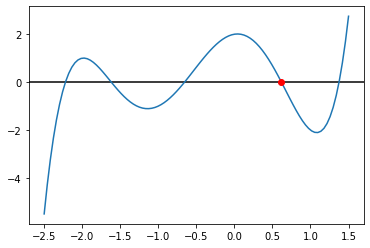

In [70]:
plt.axhline(y=0, color='k')
plt.plot(xs, ys)
plt.plot(root, f(root), 'ro')

print(pd.DataFrame({'a':list_a, 'b':list_b, 'm':list_m, 'f(m)':list_f}))

assert "{:.3f}".format(root) == "0.618"